In [1]:
from ultralytics import YOLO

In [2]:
model = YOLO("yolov8n-seg.pt")

100%|██████████| 6.74M/6.74M [00:00<00:00, 8.92MB/s]


In [3]:
results = model("http://ultralytics.com/images/bus.jpg")

100%|██████████| 134k/134k [00:00<00:00, 2.66MB/s]


image 1/1 c:\Projects\Python_basic\11_YOLO\bus.jpg: 640x480 4 persons, 1 bus, 1 skateboard, 141.5ms
Speed: 7.0ms preprocess, 141.5ms inference, 190.1ms postprocess per image at shape (1, 3, 640, 480)


In [4]:
results

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: ultralytics.engine.results.Masks object
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 

In [5]:
len(results)

1

In [6]:
for result in results:
    mask = result.masks
    for c in result.boxes.cls:
        print(model.names[int(c)]) # 딕셔너리

person
person
person
bus
person
skateboard


In [7]:
len(mask)

6

In [8]:
mask1 = mask[0]

In [9]:
mask1_data = mask1.data[0].cpu().numpy()
polygon = mask1.xy[0]
polygon

array([[     801.56,      388.12],
       [     801.56,      394.88],
       [      796.5,      399.94],
       [      796.5,      401.62],
       [     793.12,         405],
       [     793.12,      406.69],
       [     791.44,      408.38],
       [     791.44,      411.75],
       [     789.75,      413.44],
       [     789.75,      438.75],
       [     791.44,      440.44],
       [     791.44,      448.88],
       [     793.12,      450.56],
       [     793.12,      452.25],
       [     794.81,      453.94],
       [     794.81,      462.38],
       [     793.12,      464.06],
       [     793.12,      469.12],
       [     791.44,      470.81],
       [     791.44,       472.5],
       [     789.75,      474.19],
       [     789.75,      475.88],
       [     788.06,      477.56],
       [     788.06,      480.94],
       [     786.38,      482.62],
       [     786.38,      484.31],
       [     784.69,         486],
       [     784.69,      487.69],
       [     781.31,

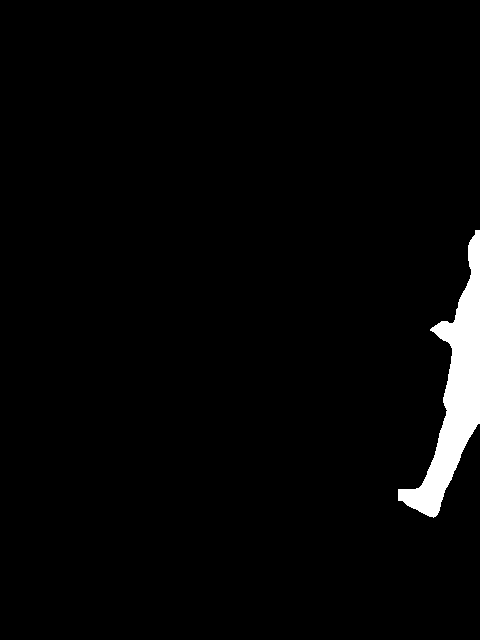

In [10]:
from PIL import Image
mask_img = Image.fromarray(mask1_data, "I")
mask_img

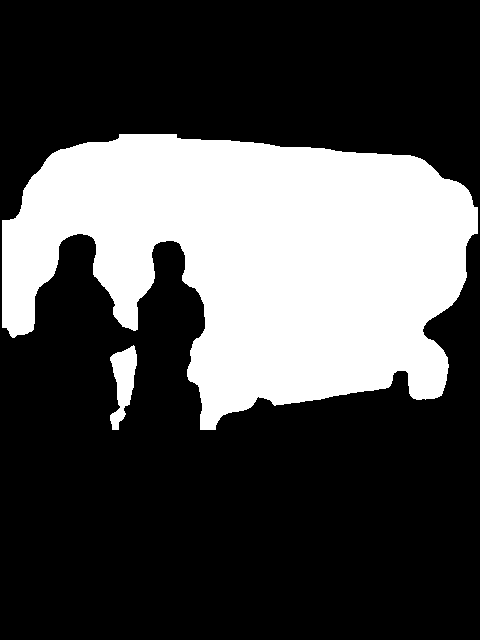

In [11]:
mask1 = mask[3]
mask1_data = mask1.data[0].cpu().numpy()
polygon = mask1.xy[0]
mask_img = Image.fromarray(mask1_data, "I")
mask_img

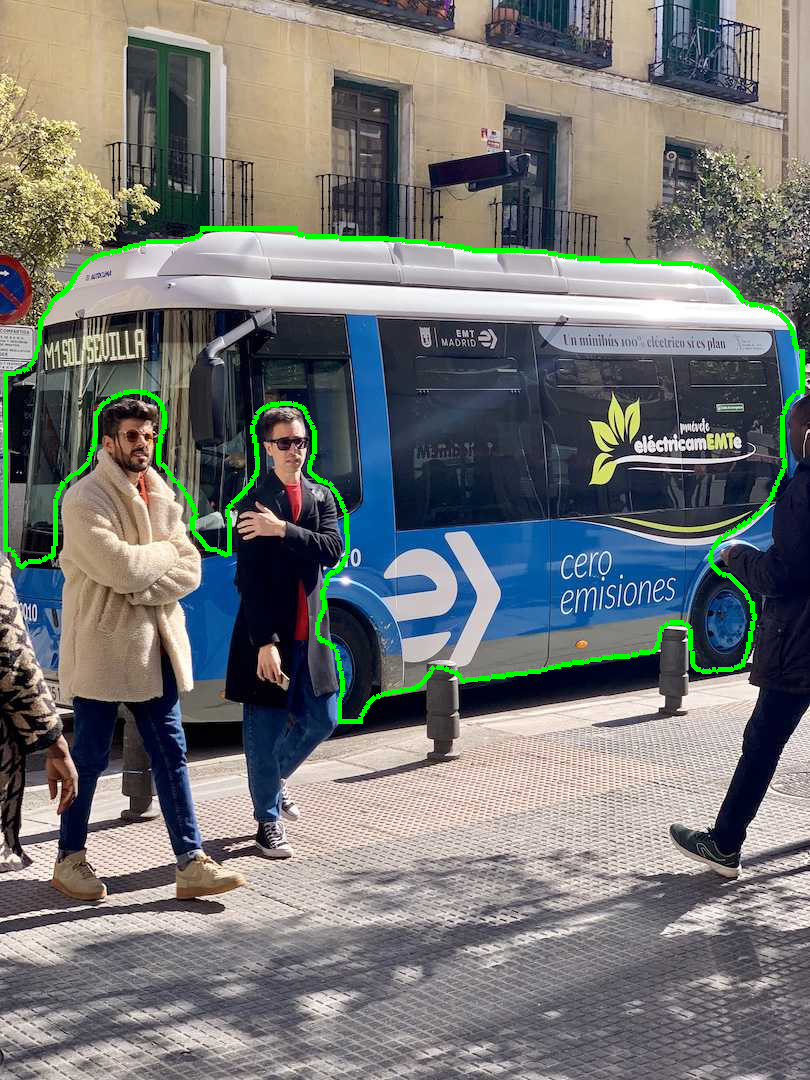

In [12]:
from PIL import ImageDraw
img = Image.open("bus.jpg")
draw = ImageDraw.Draw(img)
draw.polygon(polygon, outline=(0,255,0), width=5)
img

In [13]:
from roboflow import Roboflow
rf = Roboflow(api_key="ksasnXLJaN9rWaY1yRcW")
project = rf.workspace("segmentation-w6eax").project("cat-u6g5m")
dataset = project.version(1).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.69, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to cat-1 in yolov8:: 100%|██████████| 216/216 [00:00<00:00, 1190.67it/s]
